# ResNet

- **Training set**: LO_SARD102
- **Test/Validation set:** LO_SARD102
- **Features**: bert (128)
- **class imbalance mitigation**: SMOTE

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report


X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD102_bert128_X.npy')
Y_train = pd.read_hdf('/mnt/md0/user/scheuererra68323/LOSARD102_bert128_y.h5').is_vulnerable.values

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=10
)

X_test = numpy.load('/mnt/md0/user/scheuererra68323/JTT_bert128_X.npy')
Y_test = pd.read_hdf('/mnt/md0/user/scheuererra68323/JTT_bert128_y.h5').is_vulnerable.values

print("class counts data set before undersampling:", Counter(Y_train))
# undersample class 0
X_train, Y_train = undersample( np.reshape(X_train, (-1, 128*768) ), Y_train)
X_train = np.reshape(X_train, (-1, 128, 768))

print("Y_train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nY_val:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\nY_test:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

class counts data set before undersampling: Counter({0: 40584, 1: 366})
Y_train:
Counter({0: 366, 1: 366})
(732, 128, 768)
(732,)

Y_val:
Counter({0: 10146, 1: 92})
(10238, 128, 768)
(10238,)

Y_test:
Counter({0: 7879, 1: 93})
(7972, 128, 768)
(7972,)


## Undersampling

In [2]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(128, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
23/23 [==============================] - 30s 1s/step - loss: 6.2983 - accuracy: 0.4973 - val_loss: 505.1424 - val_accuracy: 0.0090
Epoch 2/8
23/23 [==============================] - 27s 1s/step - loss: 0.6336 - accuracy: 0.8620 - val_loss: 57.2799 - val_accuracy: 0.0090
Epoch 3/8
23/23 [==============================] - 27s 1s/step - loss: 0.1831 - accuracy: 0.9344 - val_loss: 4.0430 - val_accuracy: 0.0090
Epoch 4/8
23/23 [==============================] - 27s 1s/step - loss: 0.1179 - accuracy: 0.9686 - val_loss: 0.6086 - val_accuracy: 0.7707
Epoch 5/8
23/23 [==============================] - 27s 1s/step - loss: 0.1733 - accuracy: 0.9454 - val_loss: 0.3508 - val_accuracy: 0.9910
Epoch 6/8
23/23 [==============================] - 27s 1s/step - loss: 0.1309 - accuracy: 0.9549 - val_loss: 0.1456 - val_accuracy: 0.9910
Epoch 7/8
23/23 [==============================] - 27s 1s/step - loss: 0.0539 - accuracy: 0.9863 - val_loss: 0.0833 - val_accuracy: 0.9910
Epoch 8/8
23/23 [=======

## Evaluation

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7879
           1       0.00      0.00      0.00        93

    accuracy                           0.99      7972
   macro avg       0.49      0.50      0.50      7972
weighted avg       0.98      0.99      0.98      7972

Confusion matrix:
[[7879    0]
 [  93    0]]

Confusion matrix (Percentages):
[[98.833  0.   ]
 [ 1.167  0.   ]]

Metrics:
Sensitivity (TPR): 0.000000
Specifity (TNR):   1.000000

FPR: 0.000000
FNR: 1.000000

Balanced accuracy: 0.500000



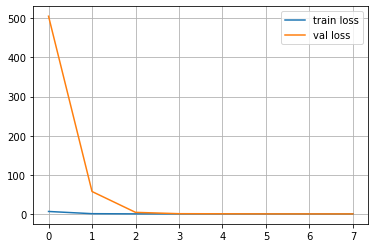

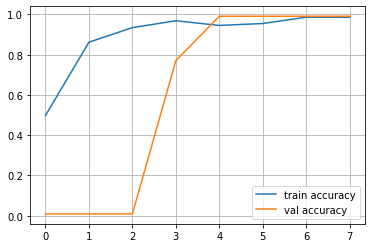

In [3]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [4]:
model.save('testJTT_ResNet_bert128_undersample.h5')

## weighted

In [5]:
X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD102_bert128_X.npy')
Y_train = pd.read_hdf('/mnt/md0/user/scheuererra68323/LOSARD102_bert128_y.h5').is_vulnerable.values

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=10
)

classWeights = {
    0: ( 1 / Counter(Y_train)[0] ) * Y_train.shape[0] / 2.0 ,
    1: ( 1 / Counter(Y_train)[1] ) * Y_train.shape[0] / 2.0
}
print("weights:", classWeights)

print("train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nval:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\ntest:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

weights: {0: 0.5045091661738617, 1: 55.942622950819676}
train:
Counter({0: 40584, 1: 366})
(40950, 128, 768)
(40950,)

val:
Counter({0: 10146, 1: 92})
(10238, 128, 768)
(10238,)

test:
Counter({0: 7879, 1: 93})
(7972, 128, 768)
(7972,)


In [6]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(128, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val),
                    class_weight=classWeights
                   )

Epoch 1/8
1280/1280 [==============================] - 319s 249ms/step - loss: 0.9730 - accuracy: 0.8105 - val_loss: 1.4997 - val_accuracy: 0.5056
Epoch 2/8
1280/1280 [==============================] - 315s 246ms/step - loss: 0.2997 - accuracy: 0.9297 - val_loss: 2.6180 - val_accuracy: 0.5292
Epoch 3/8
1280/1280 [==============================] - 314s 245ms/step - loss: 0.2076 - accuracy: 0.9559 - val_loss: 0.0147 - val_accuracy: 0.9910
Epoch 4/8
1280/1280 [==============================] - 314s 245ms/step - loss: 0.1020 - accuracy: 0.9735 - val_loss: 0.0887 - val_accuracy: 0.9643
Epoch 5/8
1280/1280 [==============================] - 315s 246ms/step - loss: 0.0720 - accuracy: 0.9801 - val_loss: 12.9566 - val_accuracy: 0.2449
Epoch 6/8
1280/1280 [==============================] - 314s 245ms/step - loss: 0.1177 - accuracy: 0.9662 - val_loss: 2.2957 - val_accuracy: 0.5147
Epoch 7/8
1280/1280 [==============================] - 314s 245ms/step - loss: 0.0927 - accuracy: 0.9780 - val_loss: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7879
           1       0.08      0.09      0.08        93

    accuracy                           0.98      7972
   macro avg       0.53      0.54      0.53      7972
weighted avg       0.98      0.98      0.98      7972

Confusion matrix:
[[7783   96]
 [  85    8]]

Confusion matrix (Percentages):
[[97.629  1.204]
 [ 1.066  0.1  ]]

Metrics:
Sensitivity (TPR): 0.086022
Specifity (TNR):   0.987816

FPR: 0.012184
FNR: 0.913978

Balanced accuracy: 0.536919



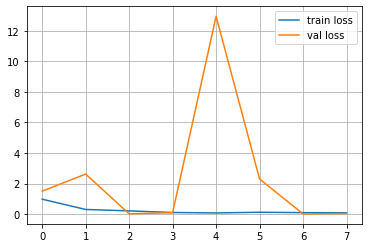

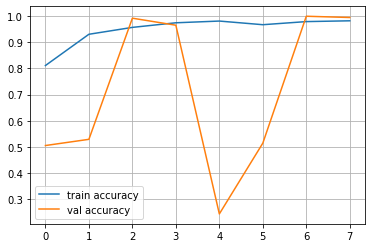

In [7]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [8]:
model.save('testJTT_ResNet_bert128_weighted.h5')

## No imbalance migation

In [9]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(128, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
1280/1280 [==============================] - 316s 247ms/step - loss: 0.0887 - accuracy: 0.9944 - val_loss: 0.0325 - val_accuracy: 0.9910
Epoch 2/8
1280/1280 [==============================] - 314s 245ms/step - loss: 0.0115 - accuracy: 0.9979 - val_loss: 0.0098 - val_accuracy: 0.9991
Epoch 3/8
1280/1280 [==============================] - 313s 245ms/step - loss: 0.0096 - accuracy: 0.9982 - val_loss: 0.0036 - val_accuracy: 0.9985
Epoch 4/8
1280/1280 [==============================] - 313s 244ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0052 - val_accuracy: 0.9980
Epoch 5/8
1280/1280 [==============================] - 311s 243ms/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 6/8
1280/1280 [==============================] - 312s 243ms/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9987
Epoch 7/8
1280/1280 [==============================] - 312s 244ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7879
           1       0.00      0.00      0.00        93

    accuracy                           0.99      7972
   macro avg       0.49      0.50      0.50      7972
weighted avg       0.98      0.99      0.98      7972

Confusion matrix:
[[7879    0]
 [  93    0]]

Confusion matrix (Percentages):
[[98.833  0.   ]
 [ 1.167  0.   ]]

Metrics:
Sensitivity (TPR): 0.000000
Specifity (TNR):   1.000000

FPR: 0.000000
FNR: 1.000000

Balanced accuracy: 0.500000



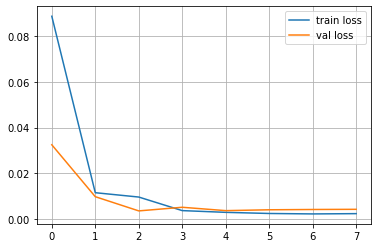

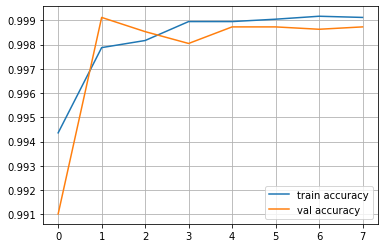

In [10]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [11]:
model.save('testJTT_ResNet_bert128.h5')

In [13]:
X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD102_bert128_X.npy')
Y_train = pd.read_hdf('/mnt/md0/user/scheuererra68323/LOSARD102_bert128_y.h5').is_vulnerable.values

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=10
)

# oversample class 1
X_train, Y_train = oversample_smote(np.reshape(X_train, (-1, 128*768)), Y_train )
X_train = np.reshape( X_train, (-1, 128, 768) )
print("class counts oversampled data set:", (X_train.shape[0], Y_train.shape[0]))

print("train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nval:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\ntest:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

imbalanced_learn version  0.7.0
Counter output before SMOTE: Counter({0: 40584, 1: 366})
Counter output after SMOTE: Counter({0: 40584, 1: 40584})
class counts oversampled data set: (81168, 81168)
train:
Counter({0: 40584, 1: 40584})
(81168, 128, 768)
(81168,)

val:
Counter({0: 10146, 1: 92})
(10238, 128, 768)
(10238,)

test:
Counter({0: 7879, 1: 93})
(7972, 128, 768)
(7972,)


In [14]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(128, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
2537/2537 [==============================] - 595s 235ms/step - loss: 0.1044 - accuracy: 0.9885 - val_loss: 0.0132 - val_accuracy: 0.9979
Epoch 2/8
2537/2537 [==============================] - 592s 234ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0089 - val_accuracy: 0.9979
Epoch 3/8
2537/2537 [==============================] - 593s 234ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0094 - val_accuracy: 0.9981
Epoch 4/8
2537/2537 [==============================] - 593s 234ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0106 - val_accuracy: 0.9981
Epoch 5/8
2537/2537 [==============================] - 592s 233ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0097 - val_accuracy: 0.9981
Epoch 6/8
2537/2537 [==============================] - 593s 234ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0107 - val_accuracy: 0.9981
Epoch 7/8
1490/2537 [================>.............] - ETA: 3:55 - loss: 0.0038 - accuracy: 0.9992

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7879
           1       0.00      0.00      0.00        93

    accuracy                           0.99      7972
   macro avg       0.49      0.50      0.50      7972
weighted avg       0.98      0.99      0.98      7972

Confusion matrix:
[[7879    0]
 [  93    0]]

Confusion matrix (Percentages):
[[98.833  0.   ]
 [ 1.167  0.   ]]

Metrics:
Sensitivity (TPR): 0.000000
Specifity (TNR):   1.000000

FPR: 0.000000
FNR: 1.000000

Balanced accuracy: 0.500000



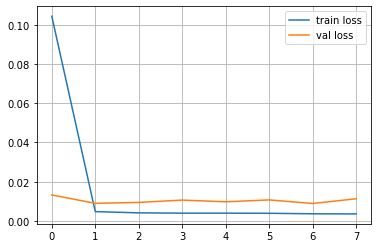

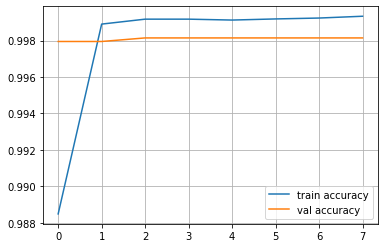

In [15]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [18]:
model.save('testJTT_ResNet_bert128_SMOTE.h5')